In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay


!pip install xgboost

from xgboost import XGBClassifier
from xgboost import plot_importance

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'C:\Users\HP\Desktop\DA\Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [6]:
# Dropping records with null values
df.dropna(inplace=True)

In [7]:
# Checking for duplicated records and getting rid of them
df[df.duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df[df.duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [10]:
# Reseting the index to get consistency among row numbers
df.reset_index(drop=True, inplace=True)

In [11]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782
std,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


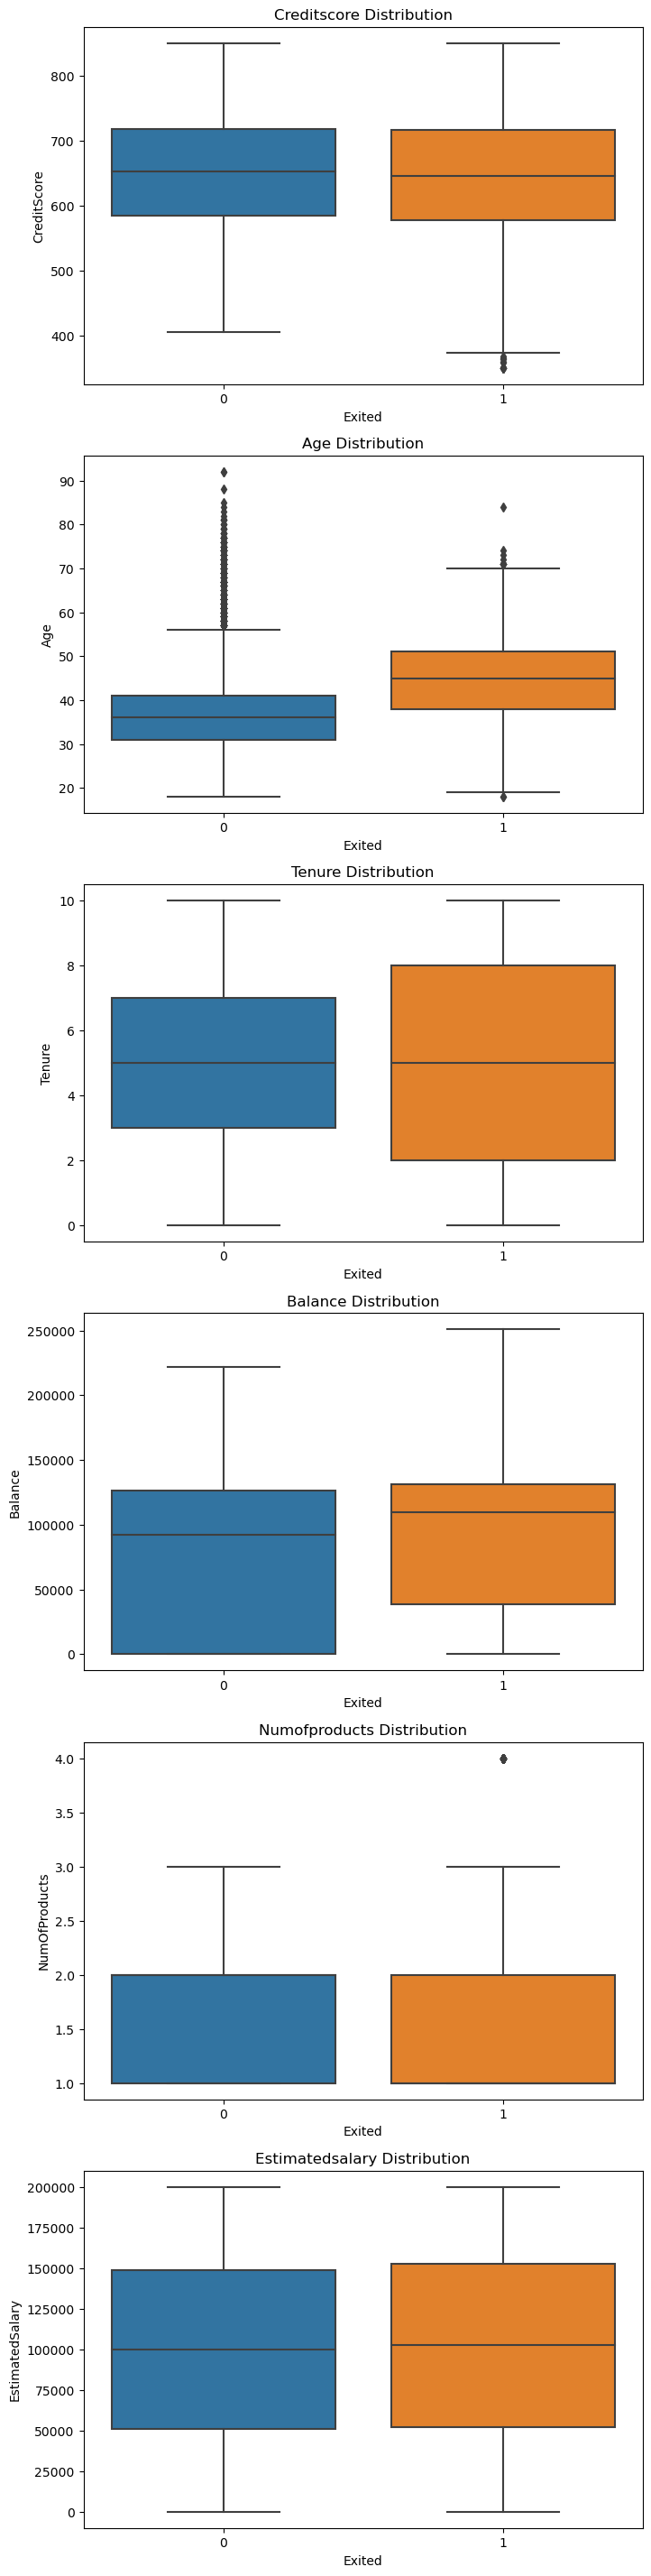

In [13]:
cont_cols = [f for f in df.columns if df[f].dtype != 'O' and df[f].nunique()>2]
n_rows = len(cont_cols)

fig, axs = plt.subplots(n_rows, figsize=(8, 6 * n_rows))
for i, col in enumerate(cont_cols):
    sns.boxplot(y=col, x='Exited', data=df, ax=axs[i])
    axs[i].set_title(f'{col.title()} Distribution')

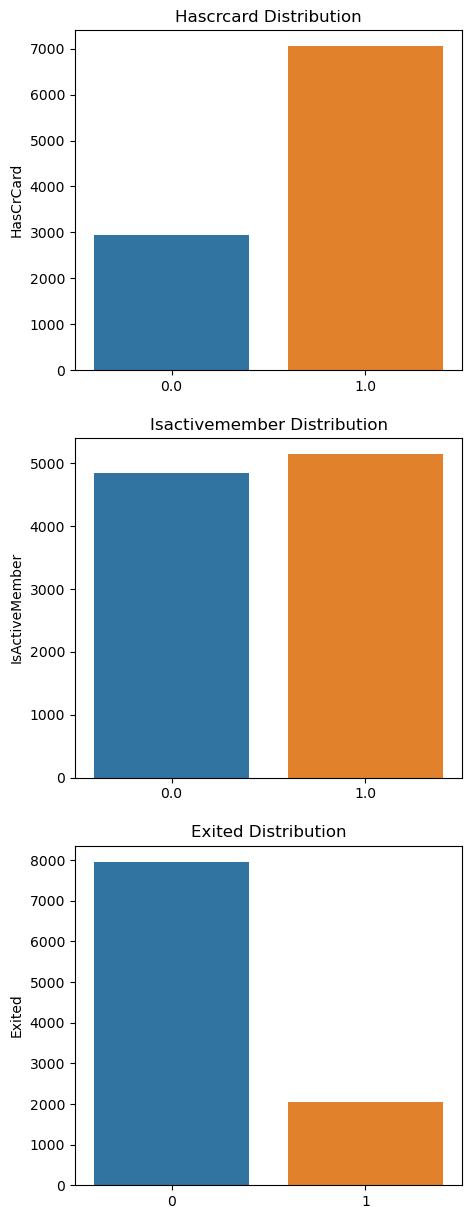

In [14]:
cont_cols = [f for f in df.columns if df[f].dtype != 'O' and df[f].nunique()<=2]
n_rows = len(cont_cols)
fig, axs = plt.subplots(n_rows, figsize=(5, 5 * n_rows))
for i, col in enumerate(cont_cols):
    sns.barplot(y=df[col].value_counts(), x=df[col].value_counts().index, ax=axs[i])
    axs[i].set_title(f'{col.title()} Distribution')

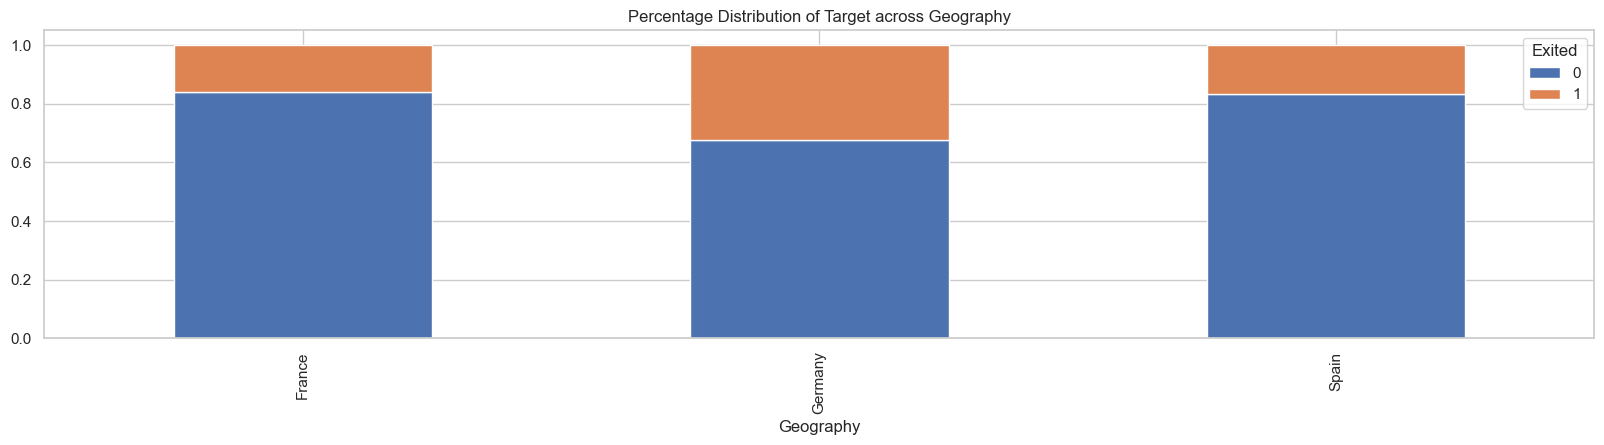

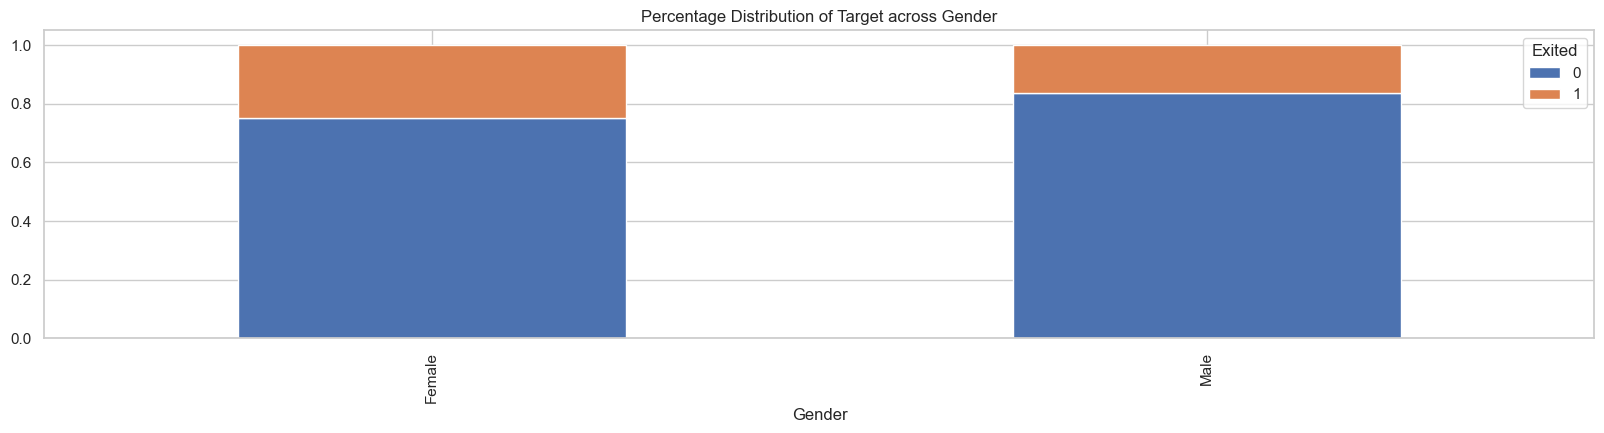

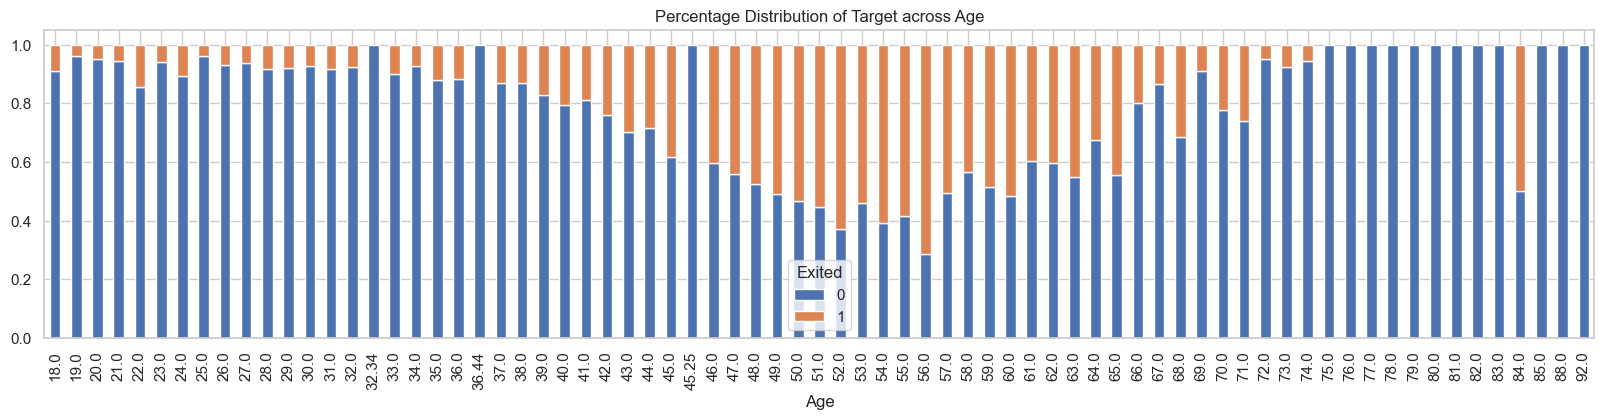

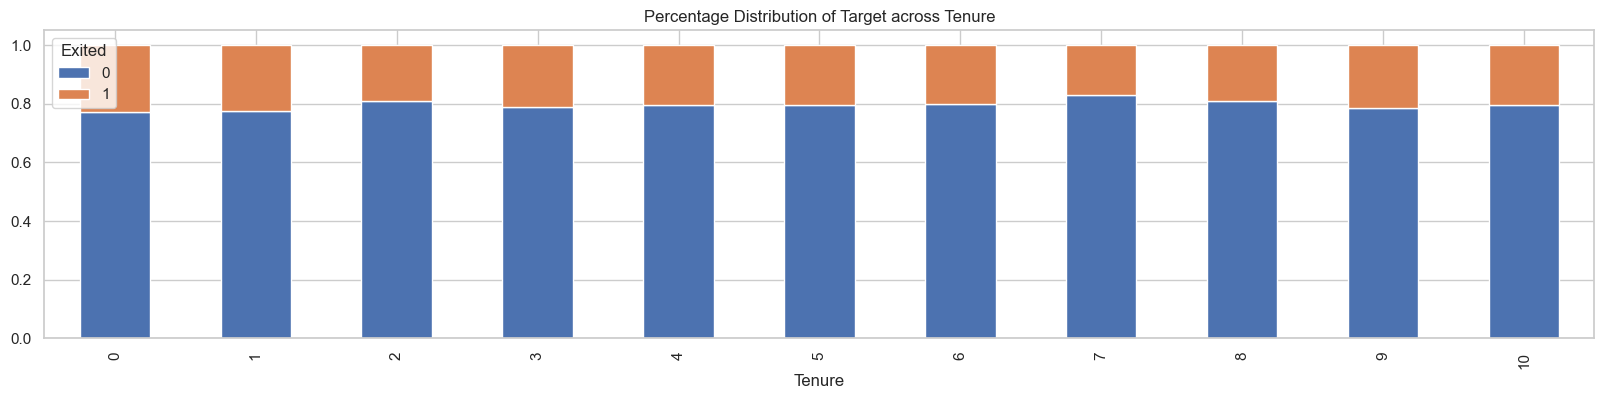

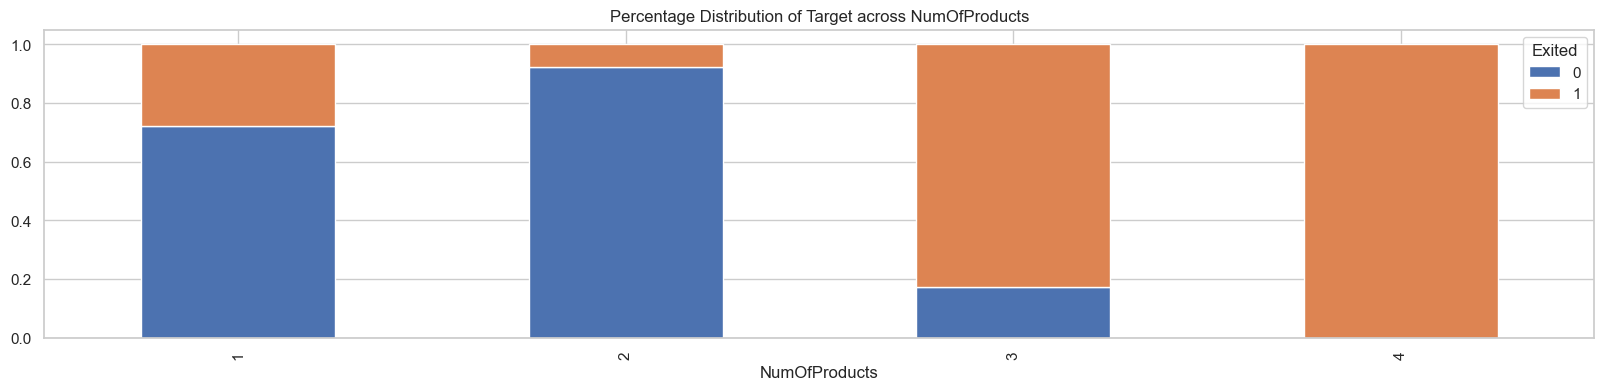

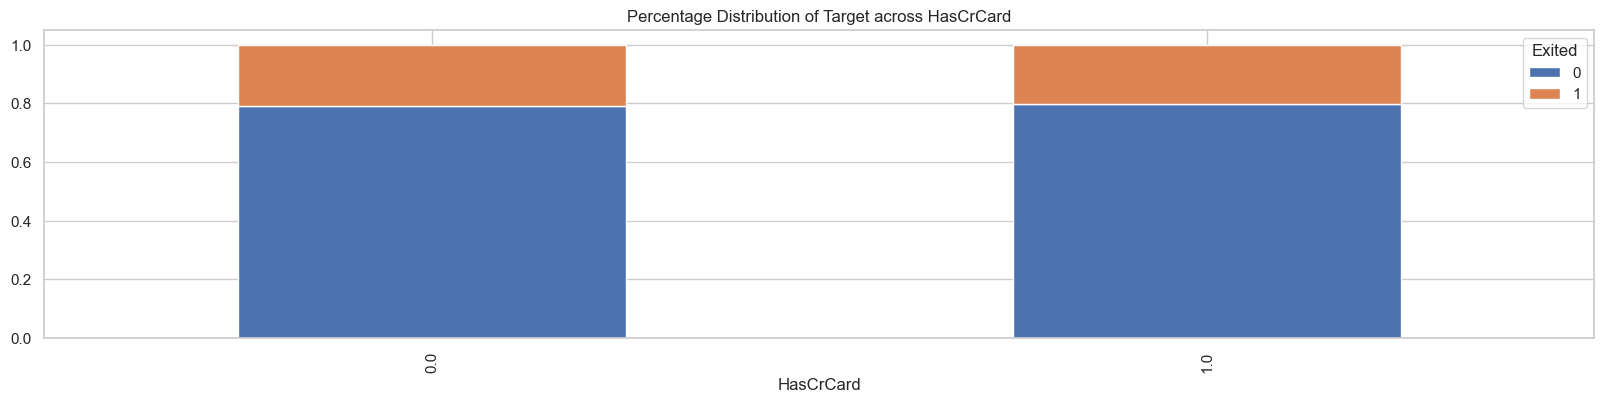

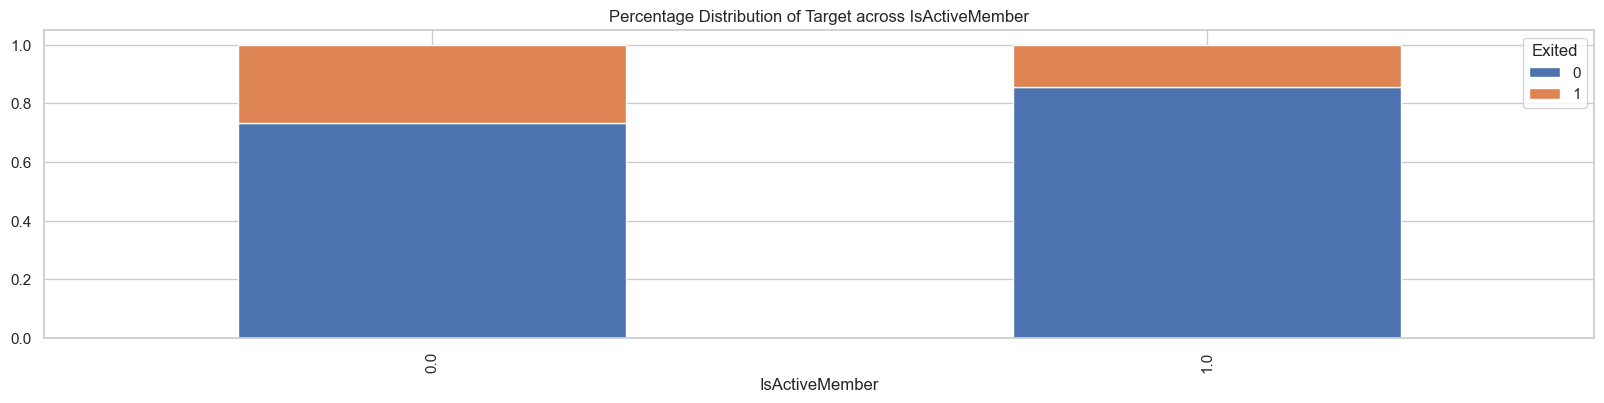

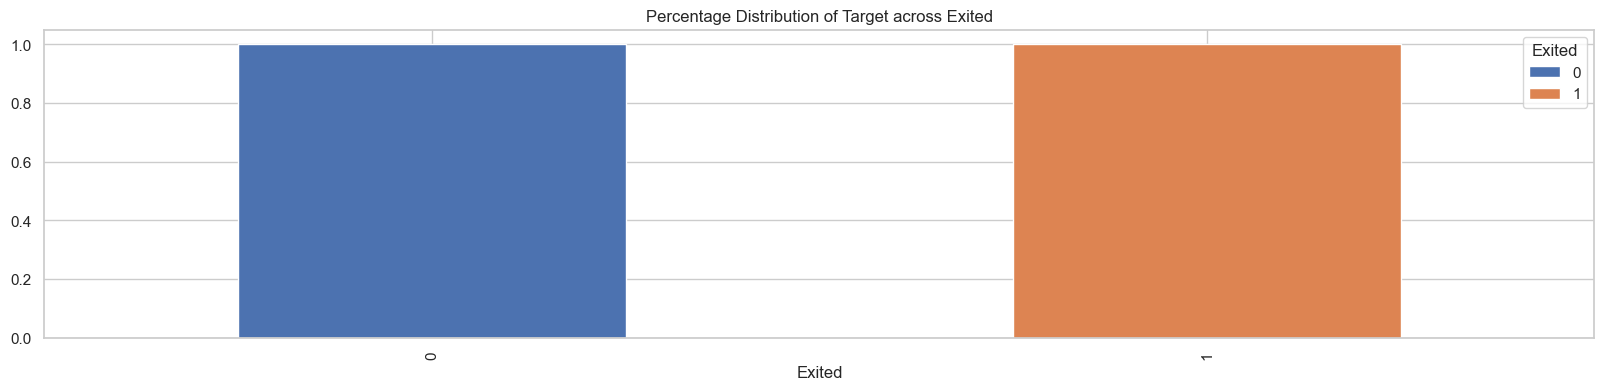

In [15]:
target = 'Exited'
cat_cols = [f for f in df.columns if (df[f].dtype != 'O' and df[f].nunique() <100) or 
             (df[f].dtype == 'O' and f not in [target] and df[f].nunique() <100) ]
n_rows = len(cont_cols)

for i, col in enumerate(cat_cols):
    contingency_table = pd.crosstab(df[col], df[target], normalize='index')
    sns.set(style="whitegrid")
    contingency_table.plot(kind="bar", stacked=True,figsize=(20, 4))
    plt.title(f"Percentage Distribution of Target across {col}")

In [16]:
df['Exited'].value_counts()

0    7959
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Age_range'>

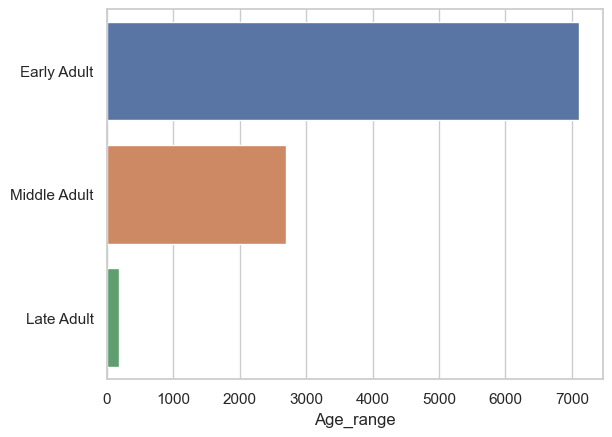

In [17]:
df['Age_range'] = pd.cut(df['Age'], bins=3, labels=['Early Adult', 'Middle Adult', 'Late Adult'])
sns.barplot(x=df['Age_range'].value_counts(), y=df['Age_range'].value_counts().index)

In [18]:
df['Total_Products'] = df['NumOfProducts'] + df['HasCrCard']

In [19]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
km = KMeans(n_clusters=3)
df['cluster'] = km.fit_predict(df)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Total_Products,Geography_Germany,Geography_Spain,Gender_Male,Age_range_Middle Adult,Age_range_Late Adult,cluster
206,689,33.0,2,161814.64,2,1.0,0.0,169381.90,0,3.0,1,0,1,0,0,2
5421,644,44.0,8,106022.73,2,0.0,0.0,148727.42,0,2.0,1,0,0,1,0,2
1112,519,42.0,8,0.00,2,1.0,1.0,101485.72,0,3.0,0,0,1,0,0,1
2483,710,32.0,3,0.00,1,1.0,0.0,94790.34,0,2.0,0,0,0,0,0,1
1929,666,74.0,7,105102.50,1,1.0,1.0,46172.47,0,2.0,1,0,1,0,1,0


In [24]:
X= df.drop('Exited', axis=1)
y= df['Exited']
y

0       1
1       0
2       1
3       0
4       1
       ..
9991    0
9992    0
9993    1
9994    1
9995    0
Name: Exited, Length: 9996, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 0)

In [26]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [27]:
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [10,20,30],
              'colsample_bytree': [0.7]
              }

In [28]:
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = 'recall',
                      cv = 5,
                      refit = 'f1'
                     )

In [29]:
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [10, 20, 30]},
             refit='f1', scoring='recall')

In [30]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 30}

In [31]:
pred = xgb_cv.best_estimator_.predict(X_test)

In [32]:
def get_test_scores(model_name:str, preds, y_test_data):

    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [33]:
get_test_scores(xgb_cv, pred, y_test)

,model,precision,recall,F1,accuracy
0,"GridSearchCV(cv=5,\n estimator=XGB...",0.731928,0.477407,0.577883,0.857943


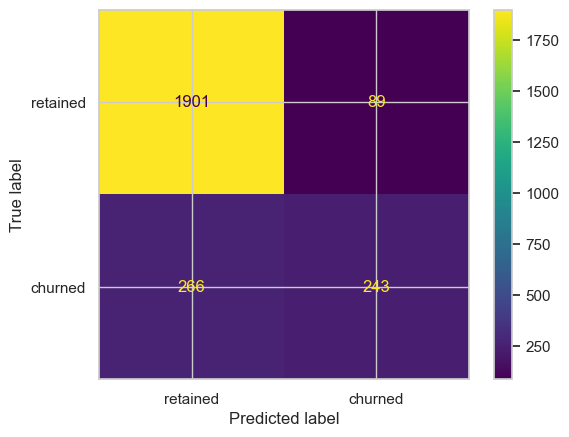

In [34]:
cm = confusion_matrix(y_test, pred, labels=xgb_cv.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

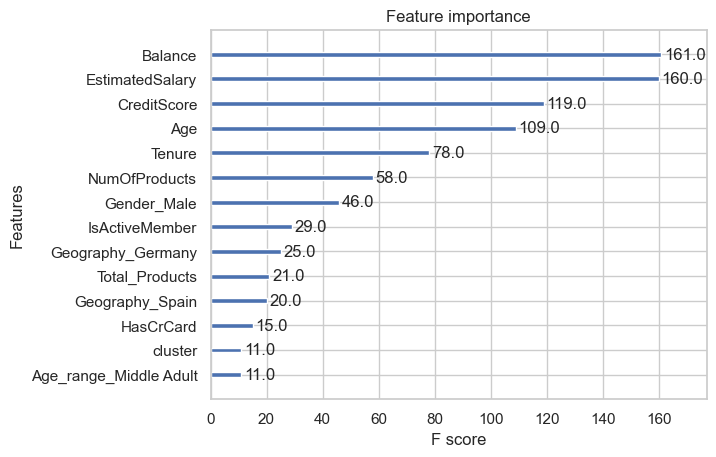

In [35]:
plot_importance(xgb_cv.best_estimator_)

Text(0.5, 1.0, 'Precision-recall curve, XGBoost model')

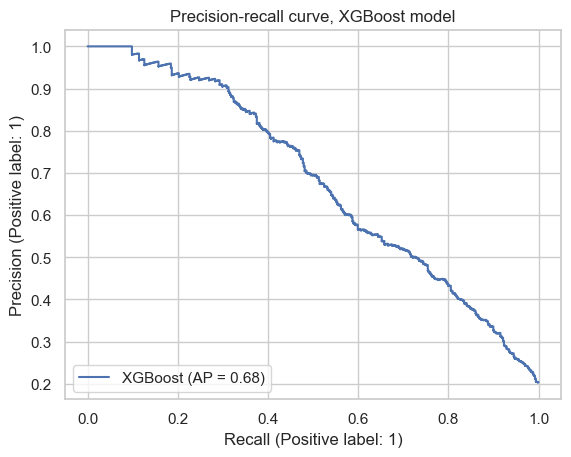

In [36]:
display = PrecisionRecallDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('Precision-recall curve, XGBoost model')

In [37]:
predicted_probabilities = xgb_cv.best_estimator_.predict_proba(X_test)
predicted_probabilities

array([[0.79348075, 0.20651923],
       [0.98926586, 0.01073412],
       [0.9311151 , 0.06888489],
       ...,
       [0.9453872 , 0.05461282],
       [0.9556108 , 0.04438921],
       [0.9620477 , 0.03795229]], dtype=float32)

In [38]:
probs = [x[1] for x in predicted_probabilities]

# Create an array of new predictions that assigns a 1 to any value >= 0.4
new_preds = np.array([1 if x >= 0.3 else 0 for x in probs])
new_preds

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
get_test_scores('XGB, threshold = 0.3', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.3",0.566421,0.603143,0.584206,0.82513
